In [1]:
import numpy as np
import torch
import torch.nn as nn

# add parent dict to path
import os, sys
sys.path.append(os.path.abspath(".."))
from src import treenode as tn

In [2]:

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes, classification=False):
        super(NeuralNet, self).__init__()
        self.hidden_sizes = hidden_sizes

        for i in range(len(hidden_sizes)):
            layer_name = f"l{i + 1}"
            relu_name = f"relu{i + 1}"
            if i == 0:
                setattr(self, layer_name, nn.Linear(input_size, hidden_sizes[i]))
                setattr(self, relu_name, nn.ReLU())
            else:
                setattr(
                    self, layer_name, nn.Linear(hidden_sizes[i - 1], hidden_sizes[i])
                )
                setattr(self, relu_name, nn.ReLU())

        output_layer_name = f"l{len(hidden_sizes) + 1}"

        setattr(self, output_layer_name, nn.Linear(hidden_sizes[-1], num_classes))
        # setattr(self, "output_activation", nn.Softmax(dim=num_classes - 1) if classification else nn.Identity())
        
    def forward(self, x):
        out = x
        for i in range(len(self.hidden_sizes)):
            layer_name = f"l{i + 1}"
            relu_name = f"relu{i + 1}"
            out = getattr(self, layer_name)(out)
            out = getattr(self, relu_name)(out)

        output_layer_name = f"l{len(self.hidden_sizes) + 1}"
        out = getattr(self, output_layer_name)(out)
        # out = getattr(self, "output_activation")(out)
        # if len(out.shape) == 1:
        #     out = out.unsqueeze(0)
        # elif len(out.shape) == 2 and out.shape[0] == 1:
        #     out = out.squeeze(0)
        # elif len(out.shape) == 3 and out.shape[0] == 1:
        #     out = out.squeeze(0)
        return out

In [3]:
# Make model
model = NeuralNet(input_size=2, num_classes=1, hidden_sizes=[2,4,3])
tree = tn.RegionTree(model.state_dict())
tree.build_tree()
root = tree.get_root()
print("Tree built successfully")


Processing Layer 1/4: 4it [00:00, 7105.98it/s]
Processing Layer 2/4: 0it [00:00, ?it/s]

Processing Layer 2/4: 16it [00:00, 3286.11it/s]
Processing Layer 3/4: 8it [00:00, 212.59it/s]
Processing Layer 4/4: 2it [00:00, 65.46it/s]

Tree built successfully


In [4]:
# some two dimensional inputs
inputs = np.random.rand(10000, 2) * 10 - 5  # Random inputs in range [-5, 5]
print(inputs)

[[-4.88010294 -4.47299514]
 [ 0.76781697  0.18969366]
 [-1.54038347 -2.26097787]
 ...
 [ 2.20677648  2.88952508]
 [-4.31454635 -2.94946788]
 [ 2.73712649  0.98032114]]


In [5]:
from tqdm import tqdm
# test_path = tree.pass_input_through_tree(inputs[0], return_path=True)
# tree.reset_counters()
tree.reset_counters()
for input in tqdm(inputs):
    tree.pass_input_through_tree(input)
    

100%|██████████| 10000/10000 [00:00<00:00, 16634.57it/s]


In [6]:
tree.read_off_counters()

Layer 0: [10000]
Total: 10000

Layer 1: [2321, 1708, 2951, 3020]
Total: 10000

Layer 2: [2321, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1270, 0, 0, 0, 438, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 700, 0, 472, 0, 0, 0, 0, 0, 0, 0, 1779, 0, 0, 0, 0, 0, 548, 0, 458, 0, 266, 0, 789, 0, 0, 0, 488, 0, 0, 0, 471, 0]
Total: 10000

Layer 3: [0, 0, 2321, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1270, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 438, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [7]:
# Read .pth file
# model_path = "../models/simple_mlp.pth"
state_dicts = {}
for filename in os.listdir("../state_dicts/"):
    if filename.endswith(".pth"):
        model_name = filename[:-4]  # Remove .pth extension
        epoch = model_name[5:]  # Extract epoch number
        # print(f"Loading model from {model_name}")
        state_dicts[epoch] = torch.load(os.path.join("../state_dicts/", filename))
        

In [8]:
# # Create trees for each epoch
# trees = {}
# for epoch, state_dict in state_dicts.items():
#     tree = tn.RegionTree(state_dict)
#     tree.build_tree()
#     trees[epoch] = tree
#     print(f"Tree for epoch {epoch} built successfully")

tree = tn.RegionTree(state_dicts['0'])
tree.build_tree()
# state_dicts

Processing Layer 1/7: 8it [00:00, 15356.72it/s]
Processing Layer 2/7: 8it [00:00, 2899.12it/s]
Processing Layer 3/7: 8it [00:00, 322.29it/s]
Processing Layer 4/7: 8it [00:00, 62.41it/s]
Processing Layer 5/7: 8it [00:01,  7.98it/s]
Processing Layer 6/7: 8it [00:05,  1.53it/s]
Processing Layer 7/7: 2it [00:09,  4.82s/it]


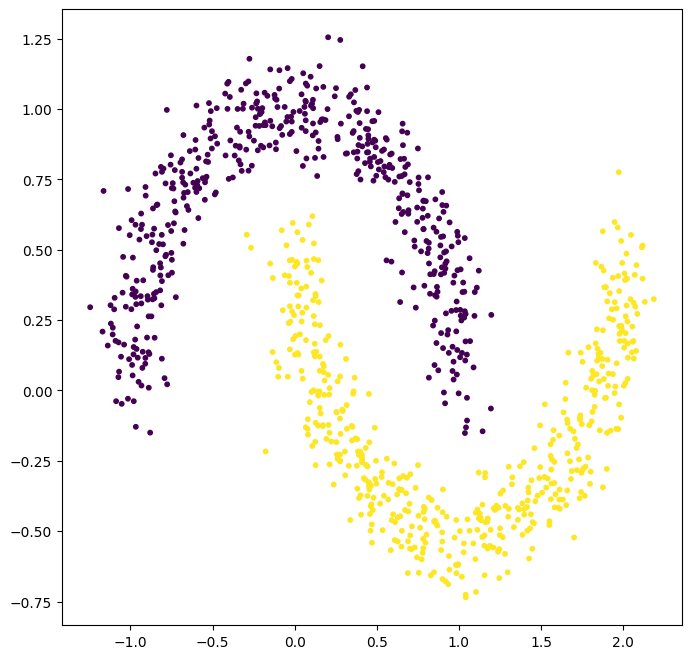

In [9]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Data to generate regions
X_train, y_train = make_moons(n_samples=1000, noise=0.1, random_state=123)

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X_train[:,0], X_train[:,1], c=y_train, s=10)
# ax.scatter(X_test[:,0], X_test[:,1], c="r", s=1)

In [10]:
X = np.array(X_train)

In [11]:
# counters = {}
# for epoch, tree in trees.items():
#     for x in X:
#         tree.pass_input_through_tree(x)
#     counters[epoch] = tree.get_counters()
    


In [12]:
# import pandas as pd

# counter_frame = pd.DataFrame.from_dict(counters)
# counter_frame.to_pickle("../dataframes/test_counters.pkl")

In [13]:
# epochs = sorted(counter_frame.keys())

# for epoch in epochs:
#     for layer_idx, layer_counters in enumerate(counter_frame[epoch]):
#             print(f"Layer {layer_idx}: {layer_counters}\nTotal: {sum(layer_counters)}\n")

## Mutual information


\begin{align}
    \hat{I}(X;Y) &= \sum_k\sum_{k'}p_{kk'}\log{\left( \frac{p_{kk'}}{p_kp_{k'}} \right)} = \sum_k\sum_{k'} \frac{n_{kk'}}{|\mathcal{D}_X||\mathcal{D}_Y|\mathcal{V}^X_k\mathcal{V}^Y_{k'}}\log{\left( \frac{\frac{n_{kk'}}{|\mathcal{D}_X||\mathcal{D}_Y|\mathcal{V}^X_k\mathcal{V}^Y_{k'}}}{\frac{n^X_k}{|\mathcal{D}_X|\mathcal{V}^X_k}\frac{n^Y_{k'}}{|\mathcal{D}_Y|\mathcal{V}^Y_{k'}}}  \right)} \nonumber \\
    &= \frac{1}{|\mathcal{D}_X||\mathcal{D}_Y|}\sum_k\sum_{k'} \frac{n_{kk'}}{\mathcal{V}^X_k\mathcal{V}^Y_{k'}}\log{\frac{n_{kk'}}{n^X_kn^Y_{k'}}} \approx \sum_k\sum_{k'} \frac{n_{kk'}}{N}\log{\frac{Nn_{kk'}}{n^X_kn^Y_{k'}}}.
\end{align}
where:
* $n_{kk'}$ is the number of points of class $k'$ in polytope $k$
* $n_k^X$ is the total number of points in polytope $k$
* $n_{k'}^Y$ is the total number of points in class $k'$.
* $N$ is the total number of data points.

In [ ]:
class0 = X_train[y_train == 0]
class1 = X_train[y_train == 1]

n0Y = len(class0)
n1Y = len(class1)

N = n0Y + n1Y

In [ ]:
from dataclasses import dataclass

@dataclass
class Region:
    layer:int
    activation:list
    number_counts:list    

In [ ]:
def get_nodes_info(node_dict):
    info = {}
    for layer, nodes in node_dict.items():
        counters = [node.counter for node in nodes]
        info[layer] = counters
        # print(f"Layer: {layer}, {counters}\nTotal: {sum(counters)}\n")
    return info

In [ ]:
# Function to calculate the mutual information for each layer
def calc_MI(state_dict):
    # Create and build tree from state dict
    tree = tn.RegionTree(state_dicts)
    tree.build_tree()
    
    # Run class 0 data through and store number counts
    tree.reset_counters()
    for input in tqdm(np.array(class0)):
        tree.pass_input_through_tree(input)
    class0_info = get_nodes_info(tree.get_nonzero_counter_nodes())
    
    # Run class 1 data through ad store number counts
    tree.reset_counters()
    for input in tqdm(np.array(class1)):
        tree.pass_input_through_tree(input)
    class1_info = get_nodes_info(tree.get_nonzero_counter_nodes())
    
    # Estimate mutual information:
    MI_layer = {}
    layers = class0_info.keys()
    for layer in layers:
        MI = 0
        # Class 0:
        for val in class0_info.values():
            MI += val / N * np.log(N*val/)
    

In [16]:
for input in np.array(class0):
    tree.pass_input_through_tree(input)
class0_nodes = tree.get_nonzero_counter_nodes()
class0_node_info = get_nodes_info(class0_nodes)
tree.reset_counters()
for input in np.array(class1):
    tree.pass_input_through_tree(input)
class1_nodes = tree.get_nonzero_counter_nodes()
class1_node_info = get_nodes_info(class1_nodes)

Layer: 0, [500]
Total: 500

Layer: 1, [70, 143, 7, 237, 2, 41]
Total: 500

Layer: 2, [70, 143, 7, 237, 2, 6, 35]
Total: 500

Layer: 3, [70, 143, 7, 237, 2, 6, 35]
Total: 500

Layer: 4, [70, 10, 133, 7, 104, 133, 2, 6, 35]
Total: 500

Layer: 5, [70, 10, 39, 94, 7, 104, 125, 8, 2, 6, 12, 23]
Total: 500

Layer: 6, [70, 10, 39, 94, 7, 104, 125, 8, 2, 6, 12, 23]
Total: 500

Layer: 7, [70, 10, 39, 94, 7, 104, 125, 8, 2, 6, 12, 23]
Total: 500

Layer: 0, [500]
Total: 500

Layer: 1, [76, 424]
Total: 500

Layer: 2, [12, 64, 302, 122]
Total: 500

Layer: 3, [12, 64, 151, 151, 122]
Total: 500

Layer: 4, [12, 16, 48, 151, 151, 6, 116]
Total: 500

Layer: 5, [12, 16, 48, 151, 49, 102, 6, 116]
Total: 500

Layer: 6, [12, 16, 48, 151, 49, 102, 6, 116]
Total: 500

Layer: 7, [12, 16, 48, 151, 49, 102, 6, 116]
Total: 500



In [17]:
get_nodes_info(class0_nodes)

for layer, counter in class0_node_info.items():
    print(f"Layer: {layer}, {counter}\nTotal: {sum(counter)}\n")

Layer: 0, [500]
Total: 500

Layer: 1, [0, 76, 0, 0, 0, 424]
Total: 500

Layer: 2, [0, 64, 0, 0, 0, 302, 122]
Total: 488

Layer: 3, [0, 64, 0, 0, 0, 151, 122]
Total: 337

Layer: 4, [0, 16, 48, 0, 0, 0, 0, 151, 116]
Total: 331

Layer: 5, [0, 16, 48, 0, 0, 0, 0, 0, 0, 102, 116, 0]
Total: 282

Layer: 6, [0, 16, 48, 0, 0, 0, 0, 0, 0, 102, 116, 0]
Total: 282

Layer: 7, [0, 16, 48, 0, 0, 0, 0, 0, 0, 102, 116, 0]
Total: 282

Layer: 0, [500]
Total: 500

Layer: 1, [70, 143, 7, 237, 2, 41]
Total: 500

Layer: 2, [70, 143, 7, 237, 2, 6, 35]
Total: 500

Layer: 3, [70, 143, 7, 237, 2, 6, 35]
Total: 500

Layer: 4, [70, 10, 133, 7, 104, 133, 2, 6, 35]
Total: 500

Layer: 5, [70, 10, 39, 94, 7, 104, 125, 8, 2, 6, 12, 23]
Total: 500

Layer: 6, [70, 10, 39, 94, 7, 104, 125, 8, 2, 6, 12, 23]
Total: 500

Layer: 7, [70, 10, 39, 94, 7, 104, 125, 8, 2, 6, 12, 23]
Total: 500



\begin{align}
    \hat{I}(X;Y) &= \sum_k\sum_{k'}p_{kk'}\log{\left( \frac{p_{kk'}}{p_kp_{k'}} \right)} = \sum_k\sum_{k'} \frac{n_{kk'}}{|\mathcal{D}_X||\mathcal{D}_Y|\mathcal{V}^X_k\mathcal{V}^Y_{k'}}\log{\left( \frac{\frac{n_{kk'}}{|\mathcal{D}_X||\mathcal{D}_Y|\mathcal{V}^X_k\mathcal{V}^Y_{k'}}}{\frac{n^X_k}{|\mathcal{D}_X|\mathcal{V}^X_k}\frac{n^Y_{k'}}{|\mathcal{D}_Y|\mathcal{V}^Y_{k'}}}  \right)} \nonumber \\
    &= \frac{1}{|\mathcal{D}_X||\mathcal{D}_Y|}\sum_k\sum_{k'} \frac{n_{kk'}}{\mathcal{V}^X_k\mathcal{V}^Y_{k'}}\log{\frac{n_{kk'}}{n^X_kn^Y_{k'}}} \approx \sum_k\sum_{k'} \frac{n_{kk'}}{N}\log{\frac{Nn_{kk'}}{n^X_kn^Y_{k'}}}.
\end{align}
where:
* $n_{kk'}$ is the number of points of class $k'$ in polytope $k$
* $n_k^X$ is the total number of points in polytope $k$
* $n_{k'}^Y$ is the total number of points in class $k'$.
* $N$ is the total number of data points.

In [ ]:
# For one layer
